In [31]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
X,y=make_circles(100,factor=0.1,noise=.1)

In [33]:
X.shape

(100, 2)

In [34]:
y.shape

(100,)

In [35]:
#将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

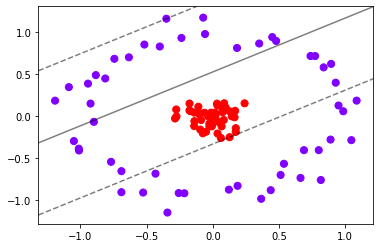

In [36]:
clf=SVC(kernel="linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [37]:
clf.score(X,y)

0.68

In [38]:
r=np.exp(-(X**2).sum(1))

In [39]:
rlim=np.linspace(min(r),max(r),100)

In [40]:
r.shape

(100,)

In [41]:
rlim.shape

(100,)

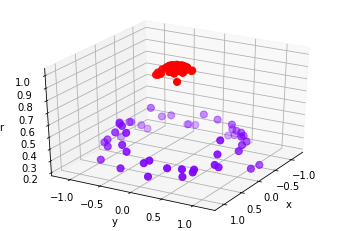

In [42]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
plot_3D()

In [43]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30,60,80,120],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 80, 120), value=30), IntSlider…

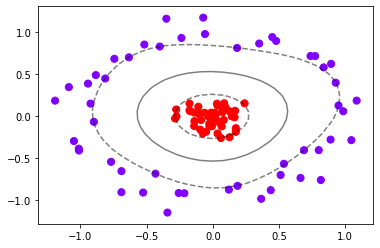

In [44]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)